This is an exmaple notebook where we are considering a dataset thay includes tweets and news articles on the Russia-Ukraine War

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

filename = "../data/tweet.csv"
df = pd.read_csv(filename)

In [21]:
df

,sentiment,text,user
0,neutral,"RT @HenriVanhanen: Finland 🇫🇮 and NATO, an upd...",dbruhn
1,neutral,This thread is so worrying. MUST READ. No wond...,CJ_flyvictor
2,neutral,RT @AfricanWatchman: Our position on #UkraineW...,Julian_Roechelt
3,neutral,"RT @DonnachaDCU: #Putin's side-kick, Dmitry Me...",TheSwedishBot
4,neutral,RT @ALFO100897: 2/2\n...ripercussione la \risp...,anto_galli4
...,...,...,...
1207,neutral,"Ukrainian flag raised over Chernobyl, nuclear ...",MovieXen
1208,neutral,"RT @JominiW: 1/ Ukrainian Theater of War, Day ...",dennisfa
1209,neutral,#Ukraine #UkraineWar #Russia #UkraineInvasion ...,UKRWarSitRep
1210,positive,RT @ADEYMARE: The absence of compassion from t...,Letisha81925310


Exploring the collected dataset and also making some basic visualisations

In [22]:
df.describe()

,sentiment,text,user
count,1212,1212,1212
unique,3,732,1006
top,neutral,RT @Klitschko: Danke deutsches Bruderland!\nTh...,olenaartresurs
freq,776,85,30


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  1212 non-null   object
 1   text       1212 non-null   object
 2   user       1212 non-null   object
dtypes: object(3)
memory usage: 28.5+ KB


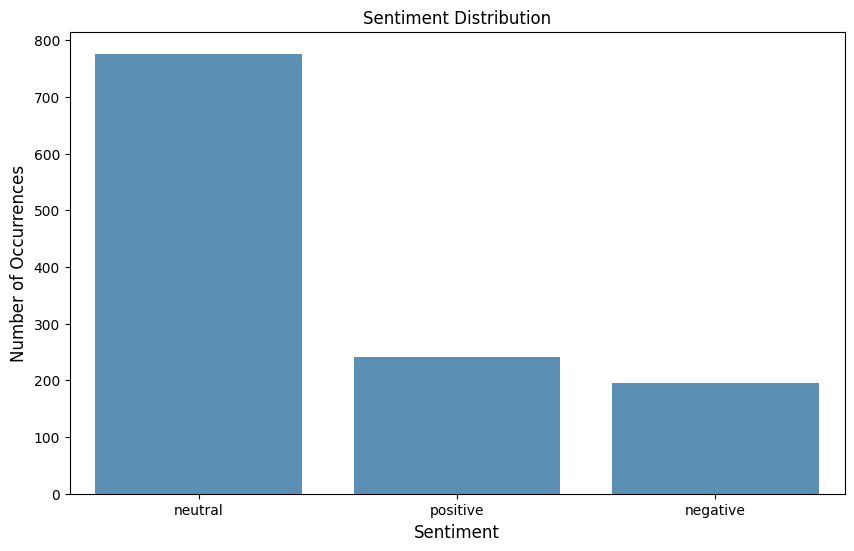

In [24]:
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=sentiment_counts.index,y=sentiment_counts.values, alpha=0.8)
plt.title('Sentiment Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.show()

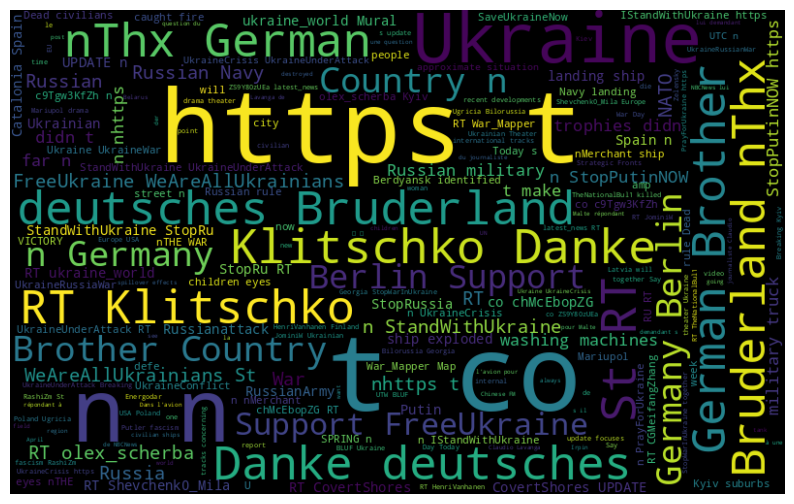

In [25]:
all_text = ' '.join(df['text'])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

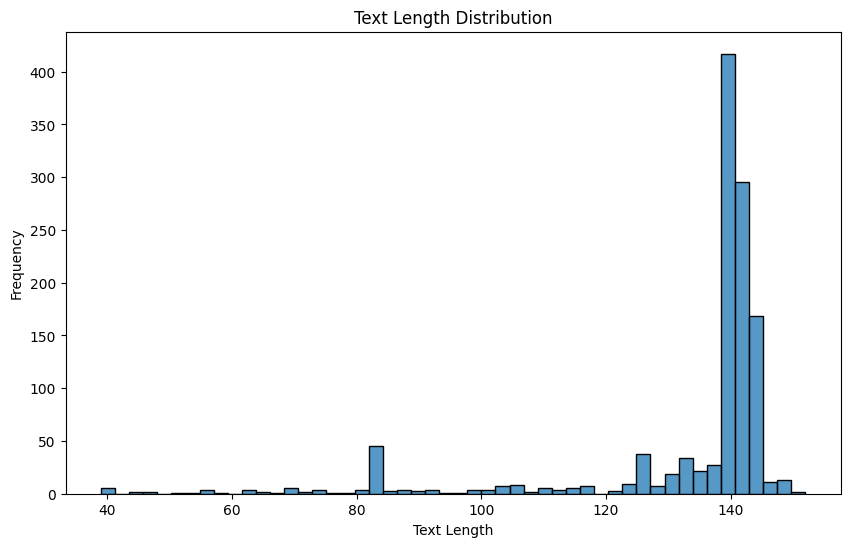

In [26]:
df['text_length'] = df['text'].apply(len)

# Histogram
plt.figure(figsize=(10,6))
sns.histplot(df['text_length'], bins=50)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

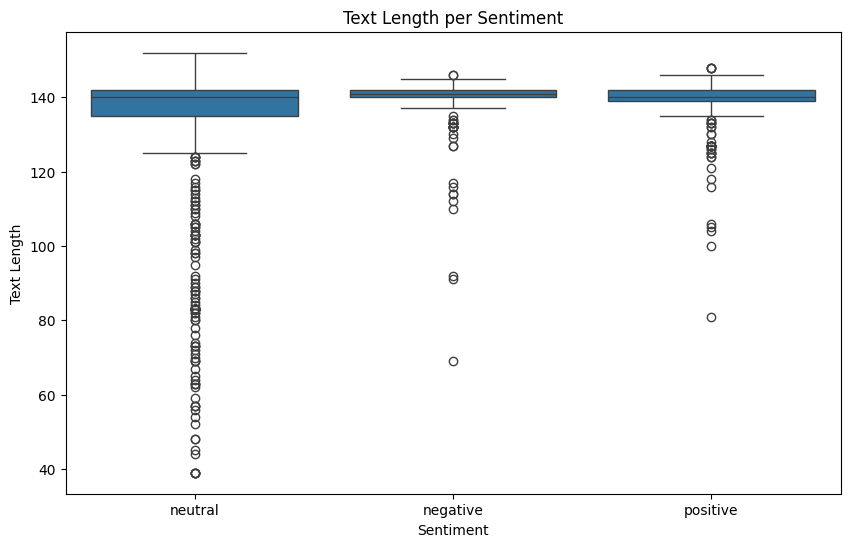

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='sentiment', y='text_length', data=df)
plt.title('Text Length per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()

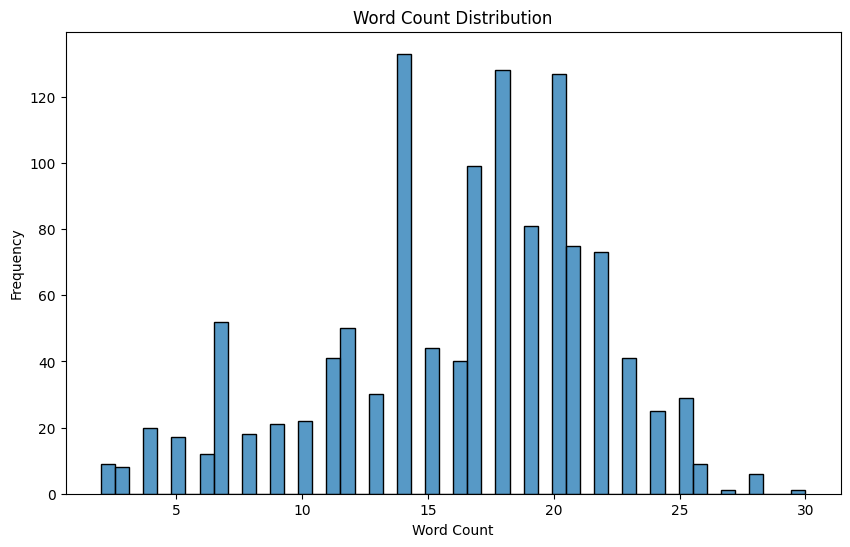

In [28]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,6))
sns.histplot(df['word_count'], bins=50)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

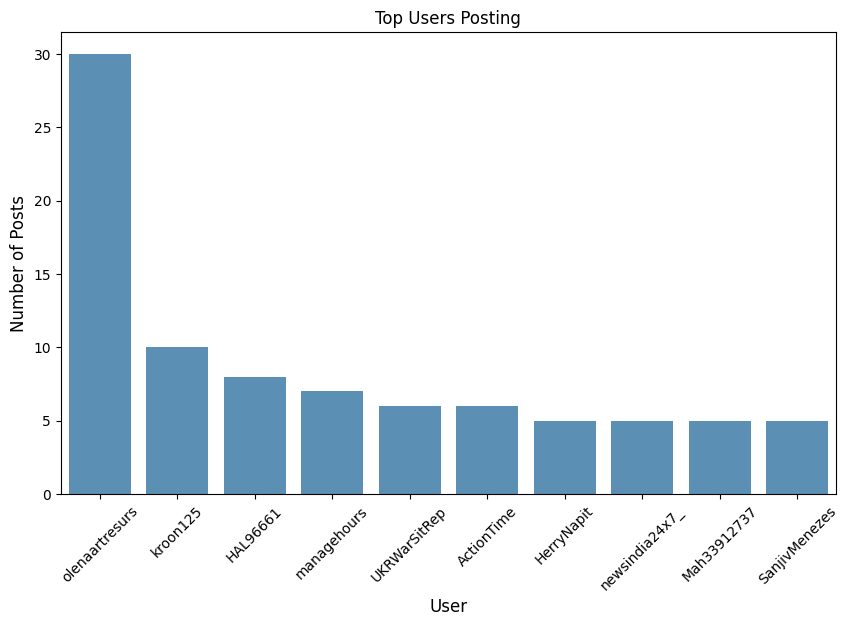

In [30]:
user_counts = df['user'].value_counts().head(10)

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=user_counts.index, y=user_counts.values, alpha=0.8)
plt.title('Top Users Posting')
plt.ylabel('Number of Posts', fontsize=12)
plt.xlabel('User', fontsize=12)
plt.xticks(rotation=45)
plt.show()

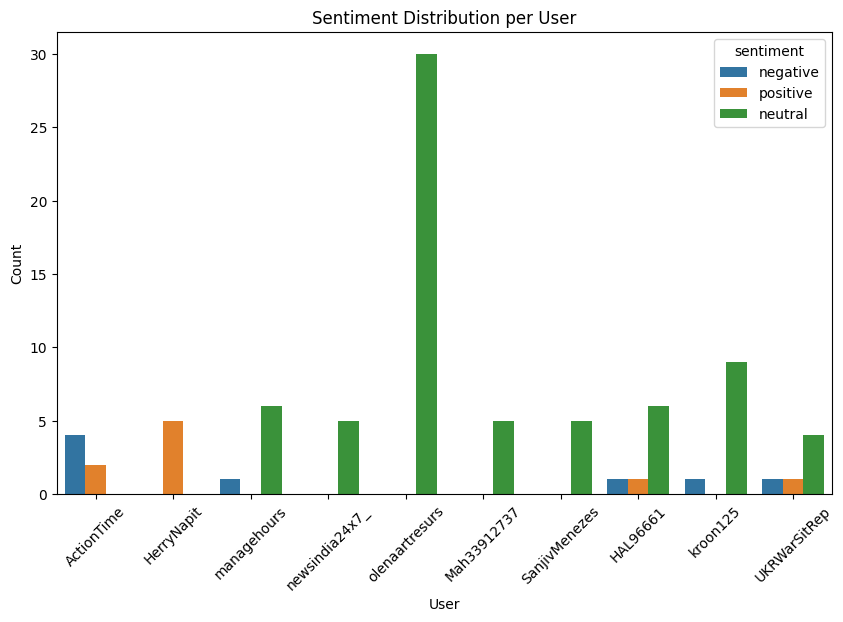

In [31]:
top_users_df = df[df['user'].isin(user_counts.index)]

plt.figure(figsize=(10,6))
sns.countplot(x='user', hue='sentiment', data=top_users_df)
plt.title('Sentiment Distribution per User')
plt.xlabel('User')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

We will now start training the model. Importing all libraries needed to train the model

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

Preprocess text data

In [34]:
df['text'] = df['text'].apply(lambda x: x.lower())  # convert to lowercase

le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

Split data into training and testing sets

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

Create a pipeline   

1. ('tfidf', TfidfVectorizer(stop_words='english')): This step will transform the text data into a numerical format that can be understood by the machine learning model. It uses the TF-IDF (Term Frequency-Inverse Document Frequency) method, which reflects how important a word is to a document in a collection or corpus. The stop_words='english' argument tells the vectorizer to ignore common English words like 'is', 'the', 'and', etc.

2. ('clf', LogisticRegression(solver='liblinear')): This step will apply a logistic regression classifier to the transformed data. Logistic regression is a statistical model used for binary classification problems. The solver='liblinear' argument specifies the algorithm to use for optimization. 'liblinear' is a good choice for small datasets and binary classification.



In [37]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(solver='liblinear')),
])

In [38]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', LogisticRegression(solver='liblinear'))])

In [39]:
y_pred = pipeline.predict(X_test)

In [40]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8189300411522634
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        41
           1       0.79      1.00      0.88       165
           2       1.00      0.49      0.65        37

    accuracy                           0.82       243
   macro avg       0.93      0.63      0.70       243
weighted avg       0.86      0.82      0.79       243



Saving the model

In [42]:
from joblib import dump

dump(pipeline, '../models/sklearn_model.joblib') 

['../models/sklearn_model.joblib']